In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('../')
from prospect_theory import fit_pt_model, get_predicted_output

In [2]:
filestring = 'task-mixedgamble_model-70b_taskstring-40gain40loss'

with open(f'{filestring}.json') as f:
    raw = json.load(f)

gambles_df = pd.read_csv(f'{filestring}.csv')
del gambles_df['response']
gambles_df = gambles_df.rename(columns={'response_int': 'response'})
gambles_df.head()

,prompt,gain,loss,response
0,You have $100 in your pocket. Q: Would you cho...,0,0,0
1,You have $100 in your pocket. Q: Would you cho...,0,2,0
2,You have $100 in your pocket. Q: Would you cho...,0,4,0
3,You have $100 in your pocket. Q: Would you cho...,0,6,0
4,You have $100 in your pocket. Q: Would you cho...,0,8,0


In [3]:
respmat = gambles_df.pivot_table(index='gain', columns='loss', values='response')


Text(0, 0.5, 'Gain')

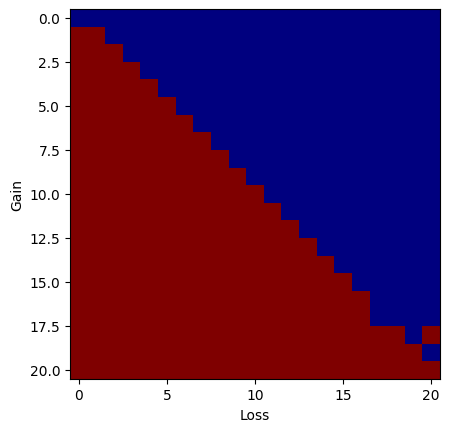

In [4]:
plt.imshow(respmat, cmap='jet')
plt.xlabel('Loss')
plt.ylabel('Gain')

/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_90776/3681996827.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_gain = gambles_df.groupby('gain').mean().reset_index()


<Axes: xlabel='gain'>

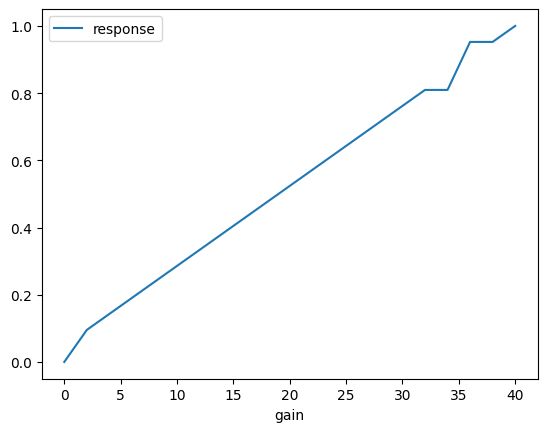

In [5]:
mean_gain = gambles_df.groupby('gain').mean().reset_index()
mean_gain.plot(x='gain', y='response', kind='line')


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_90776/1980992271.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_loss = gambles_df.groupby('loss').mean().reset_index()


<Axes: xlabel='loss'>

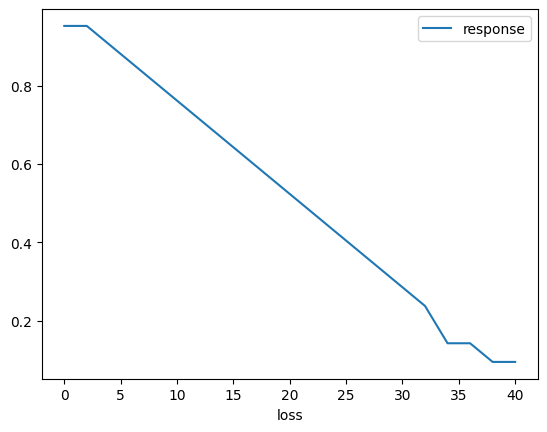

In [6]:
mean_loss = gambles_df.groupby('loss').mean().reset_index()
mean_loss.plot(x='loss', y='response', kind='line')

In [7]:
gambles_df.head()

,prompt,gain,loss,response
0,You have $100 in your pocket. Q: Would you cho...,0,0,0
1,You have $100 in your pocket. Q: Would you cho...,0,2,0
2,You have $100 in your pocket. Q: Would you cho...,0,4,0
3,You have $100 in your pocket. Q: Would you cho...,0,6,0
4,You have $100 in your pocket. Q: Would you cho...,0,8,0


In [8]:
# fit prospect theory model

params_est, _ = fit_pt_model(gambles_df, 
             pars0 = (1,1,1),
             bounds=((0, None), (0.1, 2), (0.1, 2)))
print(f'estimated prospect theory parameters:\nloss aversion (lambda): {params_est[0]:.2f}\ncurvature (rho): {params_est[1]:.2f}\ninverse temperature (mu): {params_est[2]:.2f}')

estimated prospect theory parameters:
loss aversion (lambda): 0.96
curvature (rho): 1.19
inverse temperature (mu): 1.77


In [13]:
pred = get_predicted_output(params_est, gambles_df)
pred

{'n_pred_accepted': 230, 'n_accepted': 230, 'pred_acc': 0.9954648526077098}